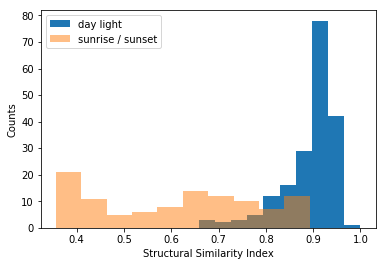

In [6]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from skimage.measure import compare_ssim as ssim

data_path = '/Users/frodo/Documents/placement/data/'
normal_data_path = data_path + 'day/'
abnormal_data_path = data_path + 'sunrise-sunset/'
image_mean_path = data_path + 'day/1514724300_0_2017-12-31-12-45-00.jpg'
image_mean_col = cv2.imread(image_mean_path)
image_mean = cv2.cvtColor(image_mean_col, cv2.COLOR_BGR2GRAY)
score_normal = []
score_abnormal = []

for img in os.listdir(abnormal_data_path):
    image_col = cv2.imread(abnormal_data_path + img)
    image = cv2.cvtColor(image_col, cv2.COLOR_BGR2GRAY)
    score = ssim(image_mean, image)
    score_abnormal.append(score)
    
for img in os.listdir(normal_data_path):
    image_col = cv2.imread(normal_data_path + img)
    image = cv2.cvtColor(image_col, cv2.COLOR_BGR2GRAY)
    score = ssim(image_mean, image)
    score_normal.append(score)

plt.hist(score_normal, label='day light')
plt.hist(score_abnormal, label='sunrise / sunset', alpha = 0.5)
plt.legend(loc='best')
plt.xlabel('Structural Similarity Index')
plt.ylabel('Counts')
plt.savefig('/Users/frodo/Desktop/ssim.png')